<a href="https://colab.research.google.com/github/DennisB676/DennisB676/blob/main/Linear_RFR_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [ ]:
BrooklynHousing = pd.read_csv('/content/Dzianis_NYC_Housing.csv')

In [ ]:
dataset = pd.read_csv("/content/Dzianis_NYC_Housing.csv")

In [ ]:
dataset.head()

,location,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
0,BAY RIDGE,6/1/2012,215000,3,1.00,1180,5650,1180,0,1928.0,11209
1,BAY RIDGE,7/11/2012,215000,3,2.25,2570,7242,2170,400,1940.0,11209
2,BAY RIDGE,5/24/2012,215000,2,1.00,770,10000,770,0,1954.0,11209
3,BAY RIDGE,12/20/2012,215000,4,3.00,1960,5000,1050,910,1954.0,11209
4,BAY RIDGE,10/25/2012,217000,3,2.00,1680,8080,1680,0,1954.0,11209


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1999 non-null   object 
 1   date           1999 non-null   object 
 2   price          1999 non-null   int64  
 3   bedrooms       1999 non-null   int64  
 4   bathrooms      1999 non-null   float64
 5   sqft_living    1999 non-null   int64  
 6   sqft_lot       1999 non-null   int64  
 7   sqft_above     1999 non-null   int64  
 8   sqft_basement  1999 non-null   int64  
 9   yr_built       1948 non-null   float64
 10  zipcode        1999 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 171.9+ KB


In [ ]:
for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For location,12 unique values present
For date,485 unique values present
For price,738 unique values present
For bedrooms,9 unique values present
For bathrooms,21 unique values present
For sqft_living,405 unique values present
For sqft_lot,1505 unique values present
For sqft_above,368 unique values present
For sqft_basement,168 unique values present
For yr_built,101 unique values present
For zipcode,15 unique values present


In [ ]:
dataset = dataset.drop(['yr_built','zipcode','location','date'],axis=1)

In [ ]:
BrooklynHousing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000,1948.000000,1999.000000
mean,2.114810e+06,3.385193,2.073287,2074.165583,1.538802e+04,1769.624812,304.540770,1907.730493,11214.656328
std,8.590464e+06,0.894148,0.758878,913.917933,4.627391e+04,825.042792,451.344537,483.228136,9.750565
min,2.000000e+05,0.000000,0.000000,380.000000,6.490000e+02,380.000000,0.000000,0.000000,11205.000000
25%,4.730000e+05,3.000000,1.500000,1420.000000,5.472000e+03,1190.000000,0.000000,1915.000000,11209.000000
50%,7.500000e+05,3.000000,2.000000,1910.000000,8.030000e+03,1550.000000,0.000000,1925.000000,11209.000000
75%,1.149500e+06,4.000000,2.500000,2505.000000,1.140000e+04,2170.000000,600.000000,1955.000000,11220.000000
max,2.769470e+08,8.000000,6.000000,8010.000000,1.651359e+06,6720.000000,2390.000000,19510.000000,11249.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

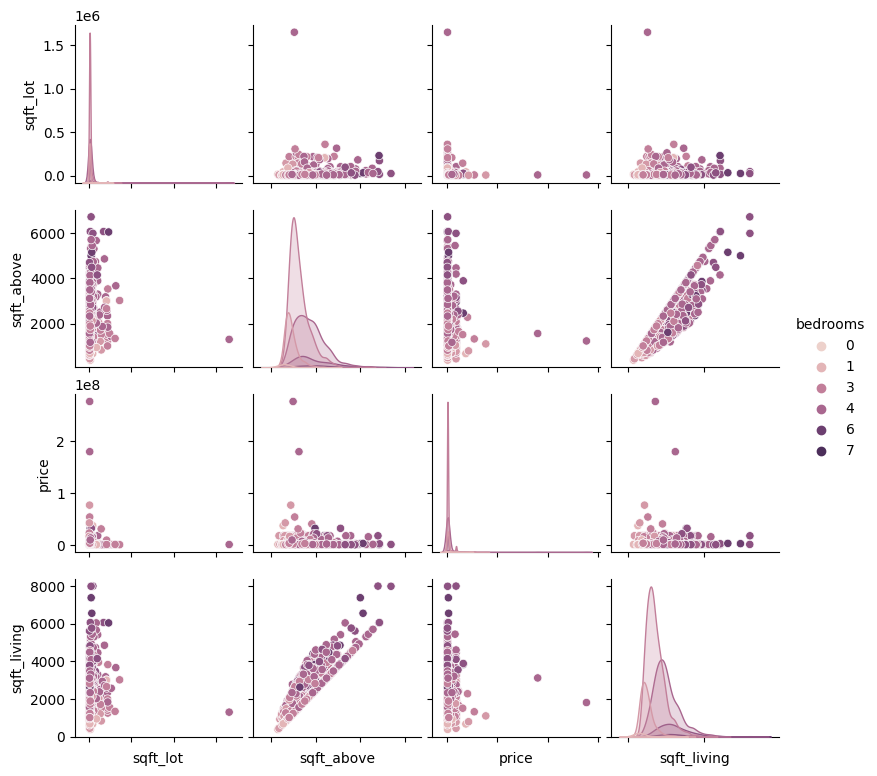

In [ ]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

In [ ]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

NameError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [ ]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [ ]:
print("The Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("The Decision tree Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("The Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))



models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

The Linear Regression Model Score is  0
The Decision tree Regression Model Score is  -41
The Random Forest Regression Model Score is  -9


,Model,Score,Explained Variance Score
0,Multiple Linear Regression,0.000905,-2652.944064
2,Random forest Regression,-0.088282,-12.266259
1,Decision Tree,-0.406137,-2.603144
